# 1. Data Preprocessing:

## Load dataset

In [1]:
import pandas as pd
df = pd.read_csv('diabetic_data.csv')
id_map = pd.read_csv('IDs_mapping.csv')
print(df.shape)
print(df.head())
print(id_map.head())

(101766, 50)
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No        

## Handle missing values and invalid entries

### replacing '?' with NA

In [2]:
df = df.replace('?', pd.NA)
print(df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Handling missing values by filling missing categorical columns with mode and numeric value with mean

In [6]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(exclude='object').columns:
    df[col] = df[col].fillna(df[col].mean())

### Removing any duplicates

In [4]:
df = df.drop_duplicates()

### stranderize text formats by converting all string columns to lowercase for consistency and ease of use

In [5]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

## Convert Multiclass to binary 

### The original column "readmitted" contains three possible values (<30,>30,NA). We want to make this into binary (1 for readmitted and 0 for not readmitted. For this, first we create new column "readmitted binary" and drop the old column.

In [7]:
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
df = df.drop('readmitted', axis=1)

### Final Clean Dataset

In [8]:
print(df.info())
print(df['readmitted_binary'].value_counts())
df.to_csv('cleaned_diabetes_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# 2. Expolatory Data Analysis (EDA):

### Understand relationships between readmission and key features (e.g., age, number of medications, diagnosis codes)

#### first, import clean dataset

In [9]:
import pandas as pd
df = pd.read_csv("cleaned_diabetes_data.csv")
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

(101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int

#### Overview of readmission classes


Overview of Readmission Distribution:
readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64


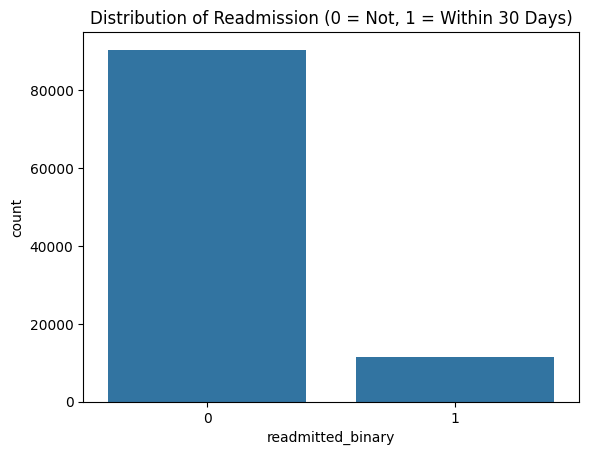

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
print("\nOverview of Readmission Distribution:")
print(df['readmitted_binary'].value_counts(normalize=True))
sns.countplot(x='readmitted_binary', data=df)
plt.title("Distribution of Readmission (0 = Not, 1 = Within 30 Days)")
plt.show()

### Relationship: Age vs Readmission

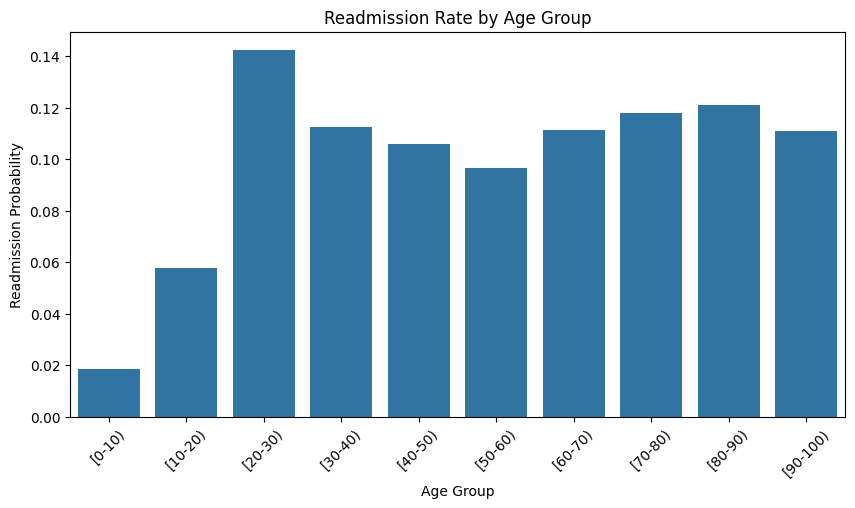


Average readmission rate by age group:
        age  readmitted_binary
2   [20-30)           0.142426
8   [80-90)           0.120835
7   [70-80)           0.117731
3   [30-40)           0.112318
6   [60-70)           0.111284
9  [90-100)           0.110992
4   [40-50)           0.106040
5   [50-60)           0.096662
1   [10-20)           0.057887
0    [0-10)           0.018634


In [16]:
df['age_numeric'] = df['age'].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(10,5))
sns.barplot(x='age', y='readmitted_binary', data=df, errorbar=None, order=sorted(df['age'].unique()))
plt.title("Readmission Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Readmission Probability")
plt.xticks(rotation=45)
plt.show()
age_readmit = df.groupby('age')['readmitted_binary'].mean().reset_index().sort_values(by='readmitted_binary', ascending=False)
print("\nAverage readmission rate by age group:")
print(age_readmit)

### Relationship: Number of Medications vs Readmission

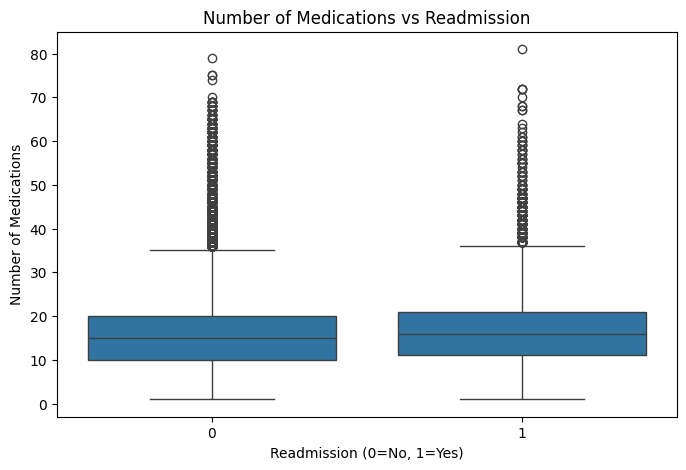


Average medications used by readmission status:
readmitted_binary
0    15.911137
1    16.903143
Name: num_medications, dtype: float64


In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='readmitted_binary', y='num_medications', data=df)
plt.title("Number of Medications vs Readmission")
plt.xlabel("Readmission (0=No, 1=Yes)")
plt.ylabel("Number of Medications")
plt.show()
print("\nAverage medications used by readmission status:")
print(df.groupby('readmitted_binary')['num_medications'].mean())

### Relationship: Number of Diagnoses vs Readmission

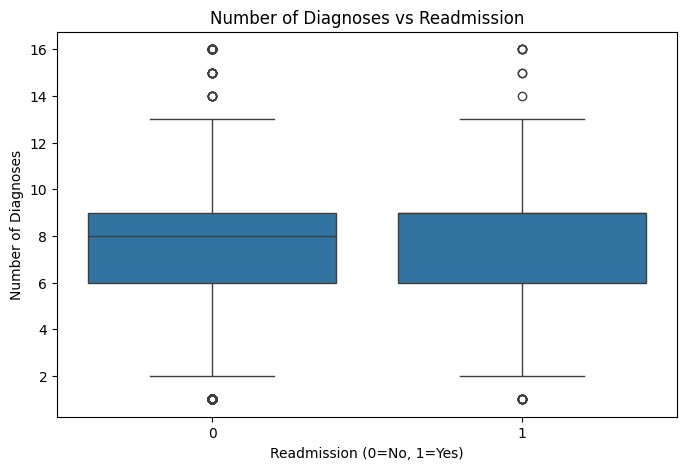


Average number of diagnoses by readmission status:
readmitted_binary
0    7.388667
1    7.692789
Name: number_diagnoses, dtype: float64


In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='readmitted_binary', y='number_diagnoses', data=df)
plt.title("Number of Diagnoses vs Readmission")
plt.xlabel("Readmission (0=No, 1=Yes)")
plt.ylabel("Number of Diagnoses")
plt.show()
print("\nAverage number of diagnoses by readmission status:")
print(df.groupby('readmitted_binary')['number_diagnoses'].mean())

### Other Correlation between key numeric function

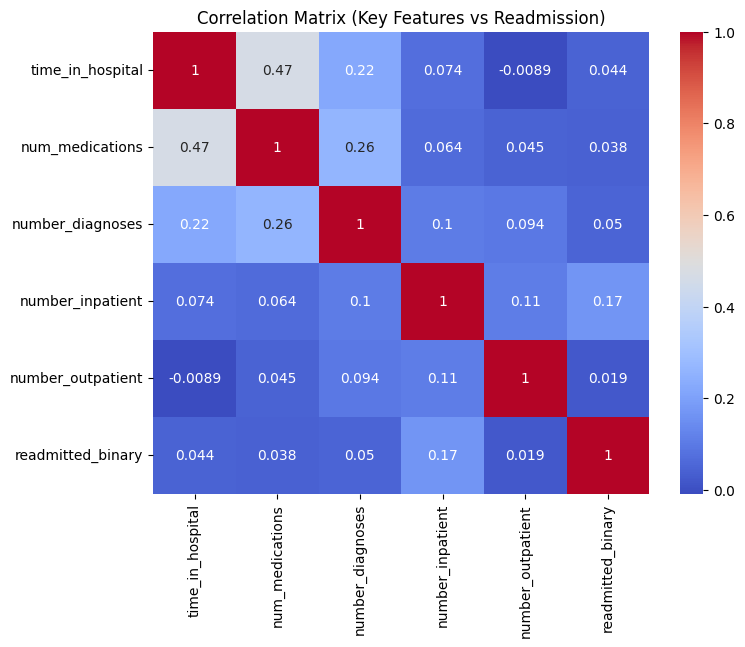

In [19]:
numeric_cols = ['time_in_hospital','num_medications','number_diagnoses',
                'number_inpatient','number_outpatient','readmitted_binary']
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Key Features vs Readmission)")
plt.show()

# 3. Feature Engineering:

### Create useful features like:
### Polypharmacy indicator (num_medications > X)
### Chronic illness flags from diagnosis codes
### Count of past procedures / admissions

#### But First we handle outliers, encode categorical values and do feature scaling.

##### Handling Outliers

In [58]:
for col in ['num_medications', 'number_diagnoses', 'time_in_hospital']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

#####

In [59]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
df['gender'] = df['gender'].map({'female': 1, 'male': 0}).fillna(0)
le = LabelEncoder()
df['race'] = le.fit_transform(df['race'])

##### Feature Scaling

In [60]:
scaler = StandardScaler()
df[['time_in_hospital', 'num_medications', 'number_diagnoses']] = scaler.fit_transform(
    df[['time_in_hospital', 'num_medications', 'number_diagnoses']]
)

#### And now we create New Features (Creative Engineering)

##### Polypharmacy indicator sign ---> patients that are taking >10 medications

In [61]:
df['polypharmacy_flag'] = np.where(df['num_medications'] > 10, 1, 0)

##### Chronic Illness Flags --> based on diagnosis codes

In [62]:
df['chronic_disease_flag'] = df['diag_1'].astype(str).str.startswith(('2', '3', '4', '5')).astype(int)

KeyError: 'diag_1'